In [1]:
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import heapq

H9: 0.6999154159025085
WHIP: 0.6943857507240914
H.1: 0.6814884664043479
FIP: 0.680514735205967
OPS: 0.6567749147863788
OBP: 0.6373513603711434
TB: 0.5658412842998497
SLG: 0.5622386971075573
SO.1: 0.5419861418178754
OPS+: 0.5224271521653293
SO9: 0.5059002266222583
PA: 0.4785712544053776
BA: 0.4741568161826446
HR9: 0.47398117842505394
H: 0.452740569476922
IP: 0.4505501156048346
BF: 0.434795014932152
HR.1: 0.4311677161053947
SF: 0.4285141698673559
BB: 0.3909016958052711
SO/W: 0.38692150643850776
tSho: 0.3399473220035335
HR: 0.2886251836292436
2B: 0.21639600371856826
BB9: 0.16222607398671618


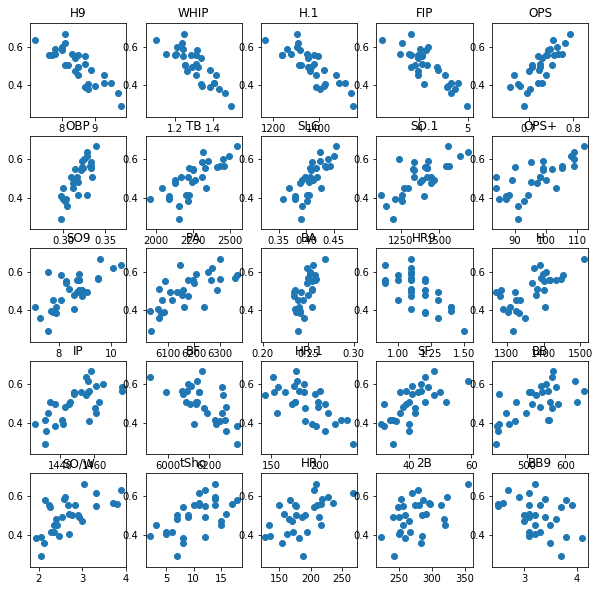

In [35]:
raw = pd.read_excel('mlb_data.xlsx', sheet_name='2018')

YVAR = 'W-L%'
EXCLUDE = ['Tm', 'ERA+', 'ERA', 'ER', 'R', 'R.1', 'RBI', 'SV', 'cSho']

# Calculate R^2 for each predictor variable
scores  = {}
for var in list(raw):
    if var == YVAR or var in EXCLUDE:
        continue
    
    lr = LinearRegression().fit(np.array(raw[var]).reshape(-1, 1),
                                raw[YVAR])
    scores[var] = lr.score(np.array(raw[var]).reshape(-1, 1),
                           raw[YVAR])

# Display the top k^2 variables
K = 5
top = heapq.nlargest(K**2, scores, key=scores.get)
for rep in top:
    print(rep + ': ' + str(scores[rep]))

# Matrix plot the top k^2 variables
fig = plt.figure(figsize=(10, 10))
for i in range(K):
    for j in range(K):
        irep = i * K + j
        ax = fig.add_subplot(K, K, irep + 1)
        
        ax.scatter(raw[top[irep]], raw[YVAR])
        plt.title(top[irep])
plt.show()

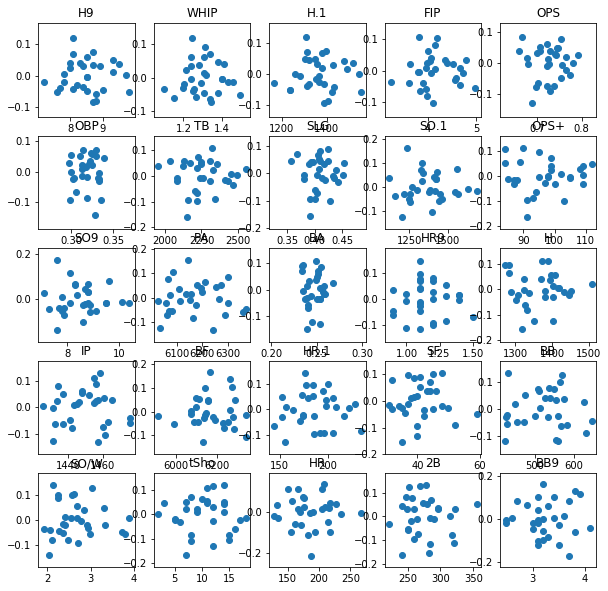

H9: 0.0
WHIP: 0.0
H.1: 0.0
FIP: 0.0
OPS: 0.0
OBP: 0.0
TB: 0.0
SLG: 0.0
SO.1: 0.0
OPS+: 0.0
SO9: 6.695339074119165e-211
PA: 0.0
BA: 0.0
HR9: 7.756709333651681e-207
H: 0.0
IP: 0.0
BF: 0.0
HR.1: 0.0
SF: 0.0
BB: 7.756709333651681e-207
SO/W: 0.0
tSho: 0.0
HR: 0.0
2B: 0.0
BB9: 0.0


In [36]:
# p-values of the Levene test for homoscedasdicity
pvs = []

def breusch_pagan_test(X, resids):
    '''Breusch-Pagan Test for Homoscedasdicity'''
    lr = LinearRegression().fit(np.array(X).reshape(-1, 1), resids)
    score = lr.score(np.array(X).reshape(-1, 1), resids)
    
    rv = scipy.stats.chi2(len(X) - 1)
    return rv.pdf(len(X) * score)

# Matrix plot the residuals by the top k^2 variables
fig = plt.figure(figsize=(10, 10))
for i in range(K):
    for j in range(K):
        irep = i * K + j
        
        X = raw[top[irep]]
        y = raw['W-L%']
        lr = LinearRegression().fit(np.array(X).reshape(-1, 1), y)
        resid = y - lr.predict(np.array(X).reshape(-1, 1))
        
        p = breusch_pagan_test(X, resid)
        pvs.append(p)
        
        ax = fig.add_subplot(K, K, irep + 1)
        ax.scatter(X, resid)
        plt.title(top[irep])
plt.show()


for i in range(len(top)):
    print(list(top)[i] + ': ' + str(pvs[i]))

In [37]:
# Display the covariances between variables
df = pd.DataFrame()
for var in top:
    df[var] = x[var]
print(df.cov())

# Exclude variables with high cov exceeding threshold
THRESH = 5.0
saved = [top[0]]
for var in top[1:]:
    discard = False
    for sav in saved:
        if x.cov()[var][sav] > THRESH:
            discard = True
            break
    if not discard:
        saved.append(var)
        
print('Variables to Keep: ' + str(saved))

             H9      WHIP          H.1        FIP       OPS       OBP  \
H9     0.392057  0.050815    56.825287   0.213591 -0.011285 -0.004704   
WHIP   0.050815  0.008413     7.349092   0.033345 -0.001792 -0.000708   
H.1   56.825287  7.349092  8356.298851  30.490920 -1.631736 -0.675299   
FIP    0.213591  0.033345    30.490920   0.161026 -0.007094 -0.002747   
OPS   -0.011285 -0.001792    -1.631736  -0.007094  0.001144  0.000375   
OBP   -0.004704 -0.000708    -0.675299  -0.002747  0.000375  0.000152   
TB   -40.069655 -6.341221 -5706.068966 -24.962828  4.601083  1.354890   
SLG   -0.006527 -0.001082    -0.947494  -0.004320  0.000764  0.000221   
SO.1 -64.315287 -9.814013 -9335.229885 -48.462161  2.786208  0.969640   
OPS+  -2.735057 -0.457305  -412.459770  -1.748046  0.231489  0.074374   
SO9   -0.355437 -0.054931   -52.201149  -0.272722  0.015881  0.005459   
PA   -36.407586 -4.873428 -4830.931034 -19.281793  2.503152  1.042166   
BA    -0.002501 -0.000355    -0.369149  -0.001339  

In [43]:
NVTU = 7

final = pd.DataFrame()
for var in saved[0:NVTU]:
    final[var] = x[var]

lr = LinearRegression().fit(final, np.array(raw[YVAR]))
print('R^2: ' + str(lr.score(final, np.array(raw[YVAR]))))
print('Coefficients: ' + str(lr.coef_))

R^2: 0.9170612793861801
Coefficients: [-3.52211989e-02 -9.50477112e-02 -6.74203717e-02  1.49008962e+01
 -1.38095280e+01  3.70733540e-04 -1.58982809e+01]


In [44]:
raw_val = pd.read_excel('mlb_data.xlsx', sheet_name='2017')
val = pd.DataFrame()
for var in saved[0:NVTU]:
    val[var] = raw_val[var]
    
print('R^2: ' + str(lr.score(val, np.array(raw_val[YVAR]))))

R^2: 0.8417120928904803
